In [0]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from torch import nn,optim

**Gathering and Loading Data**

In [0]:
transform=transforms.Compose([transforms.ToTensor()])
traindata=datasets.MNIST('/data',train=True,download=True,transform=transform)
trainloader=torch.utils.data.DataLoader(traindata,batch_size=64,shuffle=True)
testdata=datasets.MNIST('/data',train=True,download=True,transform=transform)
testloader=torch.utils.data.DataLoader(testdata,batch_size=64,shuffle=True)

In [67]:
images,labels=next(iter(trainloader))
images.shape

torch.Size([64, 1, 28, 28])

**Visualization**

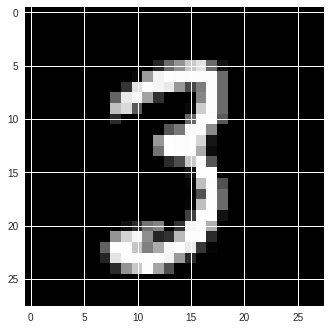

In [74]:
plt.imshow(images[0].reshape(28,28),cmap='gray')

**Autoencoder Model**

In [75]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder=nn.Linear(784,32)
        self.decoder=nn.Linear(32,784)
    
        self.relu=nn.ReLU()
        self.sigmoid=nn.Sigmoid()
    
      def forward(self,x):
        x=self.relu(self.encoder(x))
        x=self.sigmoid(self.decoder(x))
    
        return x

model=AutoEncoder()
model.cuda()
    

AutoEncoder(
  (encoder): Linear(in_features=784, out_features=32, bias=True)
  (decoder): Linear(in_features=32, out_features=784, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
)

**Loss and Optimizer Objects**

In [0]:
criterion=nn.MSELoss()
optimizer=optim.Adam(model.parameters(),lr=0.003)

**Training**

In [77]:
epoch=15
for e in range(epoch):
    running_loss=0
    for images,_ in trainloader:
        images=images.cuda()
        optimizer.zero_grad()
    
        images=images.view(images.size(0),-1)
        logits=model.forward(images)

    
        loss=criterion(logits,images)
        loss.backward()
    
        optimizer.step()
    
        running_loss+=loss.item()
    
    else:
        print('Training Loss : ',running_loss/len(trainloader))

Training Loss :  0.03635412965144621
Training Loss :  0.02307629847585329
Training Loss :  0.02240154027009506
Training Loss :  0.02218646796416245
Training Loss :  0.022031397239040972
Training Loss :  0.021925650278864894
Training Loss :  0.021812873940144393
Training Loss :  0.02173516896765814
Training Loss :  0.021660989764005517
Training Loss :  0.021607874841022213
Training Loss :  0.021559299859426805
Training Loss :  0.02153017737074638
Training Loss :  0.021466830429603168
Training Loss :  0.021444805947416372
Training Loss :  0.021414237364983636


**Image Before compression**

In [0]:
images,_=next(iter(testloader))

In [79]:
images[0].shape

torch.Size([1, 28, 28])

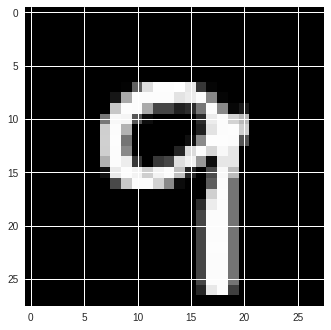

In [80]:
plt.imshow(images[0].reshape(28,28),cmap='gray')

**Image after compression**

In [0]:
with torch.no_grad():
    images=images.view(-1,784)
    images=images.cuda()
    comp_img=model.forward(images)
 

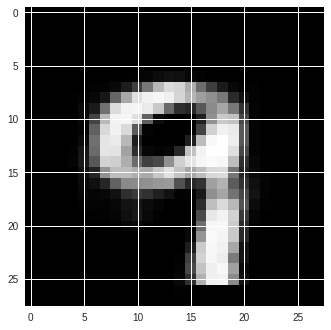

In [82]:
comp_img=comp_img.cpu()
plt.imshow(comp_img[0].reshape(28,28),cmap='gray')